***Machine Learning & Discovery | ECS 271 | Fall 2025***

# HW1 Q6

**Daniel Scalettar**

## 6.0 Setup

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from typing import List, Tuple 

In [2]:
def load_and_shuffle_data():
    #Loading the data
    M = loadmat('MNIST_digit_data.mat')
    images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']
    
    #just to make all random sequences on all computers the same.
    np.random.seed(531)
    
    #randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]
    
    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]

    return images_train, labels_train, images_test, labels_test

def show_image(i: int):
    im = images_train[i,:].reshape((28,28),order='F')
    plt.imshow(im)
    plt.title('Class Label:'+str(labels_train[i][0]))
    plt.show()

## 6.1 Implement kNN for Handwritten Digit Classification

Write a Python function that implements kNN for this task and reports the accuracy for each class (10 numbers) as well as the average accuracy (one number).

[acc acc_av] = kNN(images train, labels train, images test, labels test, k) where acc is a vector of length 10 and acc_av is a scalar.

Look at a few correct and wrong predictions to see if it makes sense.

To speed it up, in all experiments, you may use only the first 1000 testing images.

In [3]:
def kNN(images_train: np.ndarray, labels_train: np.ndarray, images_test: np.ndarray, labels_test: np.ndarray, k: int) -> Tuple[List, float]:
    # setup
    correct_label_counts = [0] * 10 
    test_label_counts = [0] * 10
    # iterate over all test images
    for i, test_image in enumerate(images_test):
        # find distances from test_image to all training images
        differences = images_train - test_image
        squared_distances = np.sum(differences**2, axis=1)
        # find labels of k-nearest training images
        k_nearest_indices = np.argsort(squared_distances)[:k]
        k_nearest_labels = labels_train[:,0][k_nearest_indices]
        # calculate majority label from k-nearest training images
        predicted_label = np.argmax(np.bincount(k_nearest_labels))
        # check predicted label against test label
        correct_label = labels_test[i,0]
        correct_label_counts[correct_label] += (predicted_label == correct_label)
        test_label_counts[correct_label] += 1
    # calculate accuracy
    avg_acc = np.sum(correct_label_counts) / len(images_test) 
    acc = [correct_label_counts[i] / test_label_counts[i] if test_label_counts[i] > 0 else 0.0 for i in range(10)]
    # return accuracy 
    return [acc, avg_acc]

In [4]:
# data setup
images_train, labels_train, images_test, labels_test = load_and_shuffle_data()
images_test_subset = images_test[:1000,:]
labels_test_subset = labels_test[:1000,:]

## 6.2 Impact of Training Set Size on Accuracy

For k = 1, change the number of training data points (30 to 10,000) to see the change in performance.

Plot the average accuracy for 10 different dataset sizes.

In the plot, x-axis is for the number of training
data and y-axis is for the accuracy.

In [5]:
def test_over_training_set_sizes(images_train: np.ndarray, labels_train: np.ndarray, images_test: np.ndarray, labels_test: np.ndarray, k: int, training_image_counts: List[int]) -> List[Tuple[List, float]]:
    test_accs = []
    for training_set_size in training_set_sizes:
        print(f"training set size: {training_set_size}")
        images_train_subset = images_train[:training_set_size,:]
        labels_train_subset = labels_train[:training_set_size,:]
        test_acc = kNN(images_train_subset, labels_train_subset, images_test, labels_test, k)
        test_accs.append(test_acc)
    return test_accs

In [6]:
# define 10 different training dataset sizes
training_set_sizes = [30, 100, 150, 200, 250, 500, 1000, 2500, 5000, 10000]
# get test accuracies
test_accs = test_over_training_set_sizes(images_train, labels_train, images_test_subset, labels_test_subset, 1, training_set_sizes)
# get average accuracies
test_avg_accs = [test_acc[1] for test_acc in test_accs] 

training set size: 30
training set size: 100
training set size: 150
training set size: 200
training set size: 250
training set size: 500
training set size: 1000
training set size: 2500
training set size: 5000
training set size: 10000


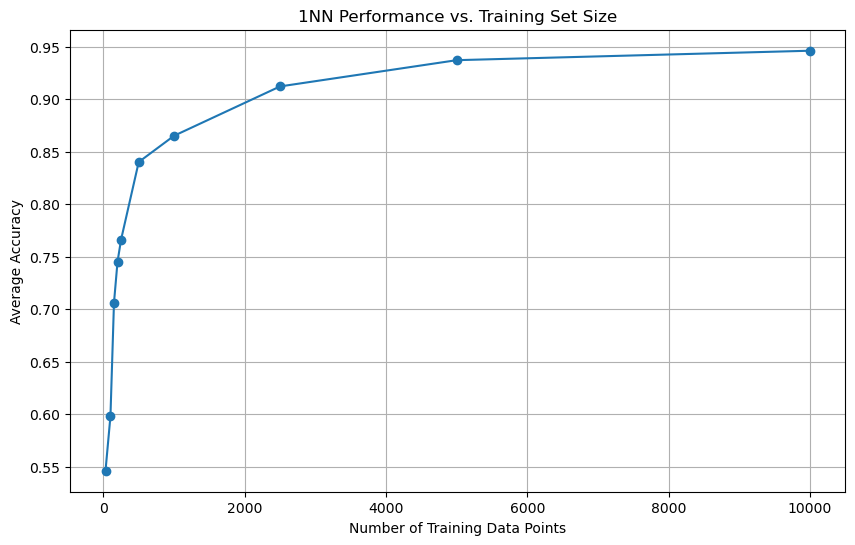

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, test_avg_accs, marker='o')
plt.title('1NN Performance vs. Training Set Size')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

## 6.3 Impact of k on Accuracy

Show the effect of k on the accuracy.

Make a plot similar to the above one with multiple colored curves on the top of each other (each for a particular k in [1 3 5 10].)

In [8]:
def test_over_k_values(images_train: np.ndarray, labels_train: np.ndarray, images_test: np.ndarray, labels_test: np.ndarray, k_values: List[int]) -> List[Tuple[List, float]]:
    test_accs = []
    for k in k_values:
        print(f"k: {k}")
        test_acc = kNN(images_train, labels_train, images_test, labels_test, k)
        test_accs.append(test_acc)
    return test_accs

In [9]:
# training set size
training_set_size = 10000
# define set of k values
k_values = [1, 3, 5, 10]
# get test accuracies
test_accs = test_over_k_values(images_train[:training_set_size,:], labels_train[:training_set_size,:], images_test_subset, labels_test_subset, k_values)
# get average accuracies
test_avg_accs = [test_acc[1] for test_acc in test_accs] 

k: 1
k: 3
k: 5
k: 10


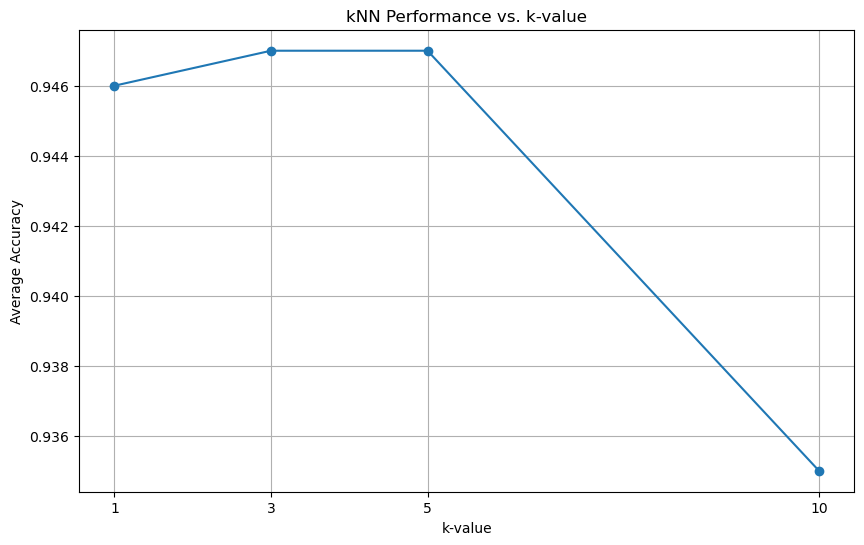

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_avg_accs, marker='o')
plt.title('kNN Performance vs. k-value')
plt.xlabel('k-value')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## 6.4 Choosing the Best k-value

Choose the best k.

First choose 2,000 training data randomly (to speed up the experiment).

Then, split the training data randomly to two halves (the first for training and the second for cross-validation to choose the best k).

Please plot the average accuracy wrt k on the validation set.

You may search for k in this list: [1 3 5 10]. Finally, report the accuracy for the best k on the testing data.

In [11]:
# split training data into training and validation
total_training_data = 2000
images_train_split = images_train[:total_training_data//2]
labels_train_split = labels_train[:total_training_data//2]

images_val_split = images_train[total_training_data//2:total_training_data]
labels_val_split = labels_train[total_training_data//2:total_training_data]

# define set of k-values
k_values = [1, 3, 5, 10]

# get test accuracies
val_accs = test_over_k_values(images_train_split, labels_train_split, images_val_split, labels_val_split, k_values)
# get average accuracies
val_avg_accs = [val_acc[1] for val_acc in val_accs] 

k: 1
k: 3
k: 5
k: 10


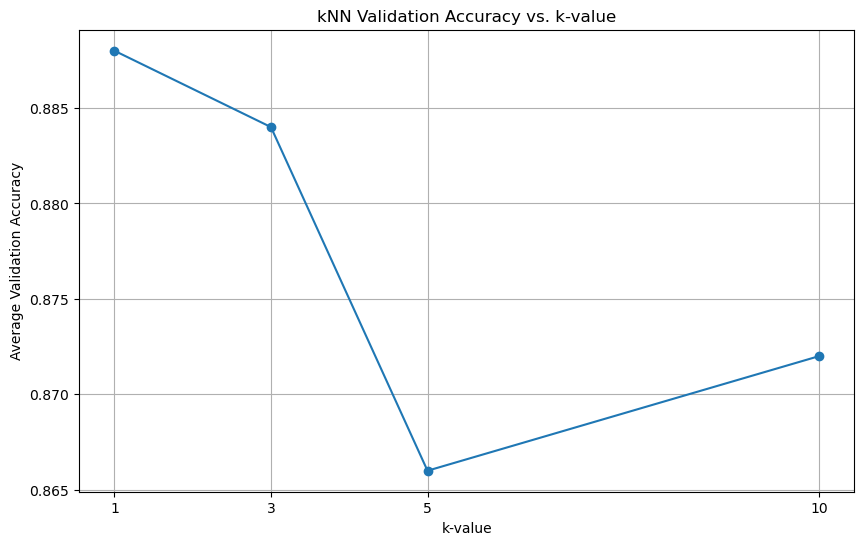

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_avg_accs, marker='o')
plt.title('kNN Validation Accuracy vs. k-value')
plt.xlabel('k-value')
plt.ylabel('Average Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [13]:
# choose the best k
best_k = k_values[np.argmax(val_avg_accs)]
print(f"Best k from validation: {best_k}")
# train on full training data for final test using best k from validation
test_accs = kNN(images_train[:total_training_data], labels_train[:total_training_data], images_test_subset, labels_test_subset, best_k)
print(f"Final Test Accuracy for Best k={best_k}: {test_accs[1]}")

Best k from validation: 1
Final Test Accuracy for Best k=1: 0.906


## Bonus (Do Not Count Towards 5 Min Run Limit)

If total training data for Section 6.4 is 10000 instead of 2000:

A higher final accuracy of 0.947 (with best k = 5) is achieved instead of 0.906 (with best k = 1).

In [14]:
# split training data into training and validation
total_training_data = 10000
images_train_split = images_train[:total_training_data//2]
labels_train_split = labels_train[:total_training_data//2]

images_val_split = images_train[total_training_data//2:total_training_data]
labels_val_split = labels_train[total_training_data//2:total_training_data]

# define set of k-values
k_values = [1, 3, 5, 10]

# get test accuracies
val_accs = test_over_k_values(images_train_split, labels_train_split, images_val_split, labels_val_split, k_values)
# get average accuracies
val_avg_accs = [val_acc[1] for val_acc in val_accs] 

k: 1
k: 3
k: 5
k: 10


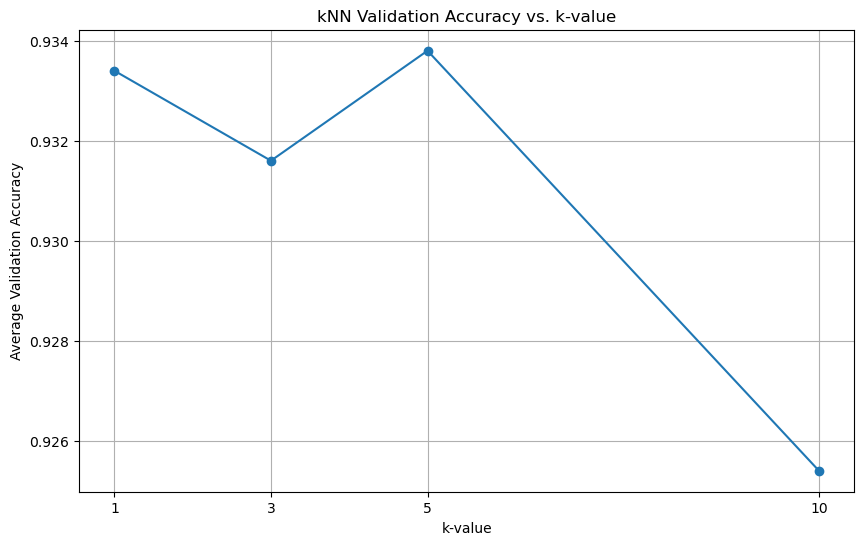

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_avg_accs, marker='o')
plt.title('kNN Validation Accuracy vs. k-value')
plt.xlabel('k-value')
plt.ylabel('Average Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [16]:
# choose the best k
best_k = k_values[np.argmax(val_avg_accs)]
print(f"Best k from validation: {best_k}")
# train on full training data for final test using best k from validation
test_accs = kNN(images_train[:total_training_data], labels_train[:total_training_data], images_test_subset, labels_test_subset, best_k)
print(f"Final Test Accuracy for Best k={best_k}: {test_accs[1]}")

Best k from validation: 5
Final Test Accuracy for Best k=5: 0.947
